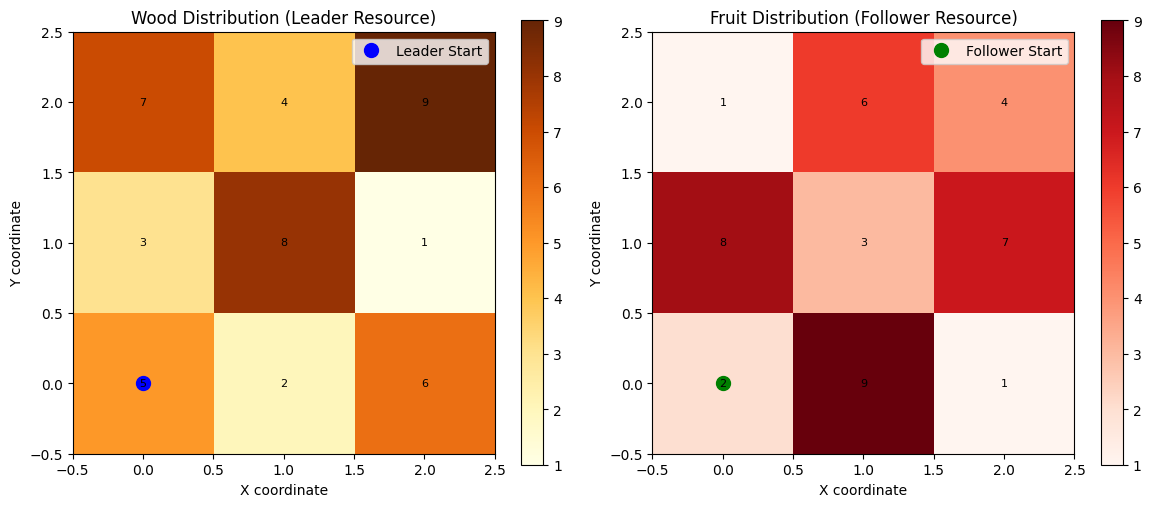

15.0 45.0


In [2]:
from src.forest_game import ForestCollectionMDP, StackelbergForestSolver
import numpy as np

# Create custom forest map
forest_map = np.array([
    [[5, 2], [3, 8], [7, 1]],
    [[2, 9], [8, 3], [4, 6]],
    [[6, 1], [1, 7], [9, 4]]
])

# Initialize game
game = ForestCollectionMDP(
    grid_size=(3, 3),
    forest_map=forest_map,
    leader_start=(0, 0),
    follower_start=(0, 0),
    max_steps_leader=5,
    max_steps_follower=5
)

# Visualize the forest
game.visualize_forest()

# Solve for equilibrium
solver = StackelbergForestSolver(game)
leader_payoff, follower_payoff = solver.evaluate_strategy_profile({})
print(leader_payoff, follower_payoff)


In [4]:
from src.solvers.stackelberg_solver import StackelbergSolver, ThreatType

solver = StackelbergSolver(game)
# Find equilibria with different threats
equilibria = solver.find_stackelberg_equilibrium([
    ThreatType.NO_THREAT,
    ThreatType.FRUIT_AVOIDANCE,
    ThreatType.PUNISHMENT
])

print(equilibria)
# Analyze threat credibility
# credibility = solver.analyze_threat_credibility(leader_policy)

[Strategy(L:12.29, F:36.86), Strategy(L:12.29, F:36.86), Strategy(L:12.29, F:36.86)]
